# Regularized Linear Regression Project

This project dataset has a lot of features related to socio demographic and health resources data by county in the United States, right before the Covid-19 pandemic started (data from 2018 and 2019). It was taken from the WIDS 2022 competition on Kaggle.
We want to discover if there is any relationship between health resources and socio demographic data. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

## Dataset download and first exploration

In [3]:
# Reading the dataset
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv")

In [4]:
df_raw.head(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
list(df_raw.columns)

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [7]:
pd.options.display.max_columns=200
pd.options.display.max_rows=40

In [8]:
df_raw.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
2688,48335,8145,992,12.179251,967,11.872314,1444,17.728668,1170,14.364641,984,12.081031,929,11.405770,829,10.178023,528,6.482505,302,3.707796,6895,84.653161,858,10.534070,149,1.829343,54,0.662983,10,0.122775,179,2.197667,8145,-87,1428,12.6,8.4,4.2,0.1,-14.8,-14.7,1225,2152,1711,681,21.2,37.3,29.7,11.8,1432,21.4,26.7,25.8,48529,44404,52654,2338,2235,103,4.4,48529,80.0,224.8,199.9,72.9,66.5,6.2,5.4,2.809419,1.658125,0.148417,3.081847,2.727690,9.619563,0,8774,1647,18.8,Mitchell,Texas,48,335,6394,48.3,46.5,49.9,3086,37.3,36.0,38.7,2385,7.4,6.8,8.0,475,7.3,6.4,8.2,466,12.7,12.0,13.4,812,3.1,2.9,3.3,198,6
112,5007,272608,38930,14.280579,39036,14.319462,35344,12.965137,41535,15.236163,35859,13.154053,31625,11.600907,25348,9.298333,16396,6.014497,8535,3.130869,241735,88.674947,5528,2.027820,5137,1.884391,11131,4.083152,1954,0.716780,7123,2.612909,272608,6104,2146,13.7,6.6,7.0,1.8,13.8,15.6,20120,49182,44756,54780,11.9,29.1,26.5,32.4,23290,8.6,12.1,11.0,68978,64755,73201,134404,130532,3872,2.9,68978,146.5,207.6,188.2,79.9,75.0,7.0,6.5,118.040510,18.904572,7.959820,81.316796,152.412459,328.975735,30,251823,44616,17.7,Benton,Arkansas,5,7,201039,41.9,40.2,43.8,84302,32.7,31.3,34.1,65740,7.0,6.4,7.7,14170,7.0,5.9,8.1,13975,10.3,9.6,11.2,20795,2.6,2.4,2.8,5240,3
2685,48329,172578,29498,17.092561,23748,13.760734,26686,15.463153,28595,16.569319,19388,11.234340,18170,10.528573,14670,8.500504,6890

### Check for null values and duplicated data

In [9]:
df_raw.duplicated().any()

False

In [10]:
print(df_raw.isnull().sum().sort_values(ascending=False))

fips                                0
Total nurse practitioners (2019)    0
STATE_NAME                          0
COUNTY_NAME                         0
Percent of Population Aged 60+      0
                                   ..
POP_ESTIMATE_2018                   0
% Two or more races                 0
Two or more races pop               0
% Hawaiian/PI-alone                 0
Urban_rural_code                    0
Length: 108, dtype: int64


## Definition of the problem

We have to choose one target variable (related to health resources), and use the LASSO model to reduce features to the most important ones for your target.

Looking at the dataset we want to work with the availability of ICU Beds_x, for this we going to work with the features:

**'fips'**:	FIPS Code for the County

**'Active Physicians per 100000 Population 2018 (AAMC)'**: Total Active Patient Care Physicians per 100,000 Population, 2018 (Assumed identical to state)

**'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)'**: Active Primary Care Physicians per 100,000 Population, 2018 (Assumed identical to state)	

**'Active Primary Care Physicians per 100000 Population 2018 (AAMC)'**: Active Patient Care Primary Care Physicians per 100,000 Population, 2018 (Assumed identical to state)

**'Total nurse practitioners (2019)'**: Total nurses (2019) (Assumed proportion to fraction of state population living in county

**'Total physician assistants (2019)'**: Total physical assistants (2019) (Assumed proportion to fraction of state population living in county	

**'Total Hospitals (2019)'**: Total Hospitals (2019) (Assumed proportion to fraction of state population living in county)

**'Total Specialist Physicians (2019)'**: Sum of Psychiatry, Surgery, Anesthesiology, Emergency Med, Radiology, Cardiology, Oncology, Endocrinology, and Other specialists (2019) (Assumed proportion to fraction of state population living in county 

**'ICU Beds_x'**: Number of ICU beds per county

**'Total Population'**: Total Population

In [11]:
df = df_raw.copy()
df = df[['fips', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 
            'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Total Specialist Physicians (2019)', 'ICU Beds_x', 'Total Population']]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 10 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   fips                                                                    3140 non-null   int64  
 1   Active Physicians per 100000 Population 2018 (AAMC)                     3140 non-null   float64
 2   Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)  3140 non-null   float64
 3   Active Primary Care Physicians per 100000 Population 2018 (AAMC)        3140 non-null   float64
 4   Total nurse practitioners (2019)                                        3140 non-null   float64
 5   Total physician assistants (2019)                                       3140 non-null   float64
 6   Total Hospitals (2019)                                                  3140 non

### Descriptive Statistics

In [13]:
round(df.describe())

,fips,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population
count,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0,3140.0
mean,30402.0,255.0,226.0,88.0,53.0,28.0,2.0,167.0,24.0,102227.0
std,15151.0,42.0,32.0,13.0,154.0,86.0,4.0,543.0,85.0,328388.0
min,1001.0,191.0,175.0,65.0,0.0,0.0,0.0,0.0,0.0,74.0
25%,18180.0,228.0,203.0,79.0,5.0,2.0,0.0,15.0,0.0,10967.0
50%,29178.0,247.0,224.0,87.0,13.0,6.0,1.0,36.0,0.0,25704.0
75%,45082.0,279.0,241.0,95.0,35.0,19.0,1.0,104.0,12.0,67501.0
max,56045.0,847.0,619.0,240.0,3938.0,2023.0,92.0,15014.0,2126.0,10105722.0


### Visualizing the data

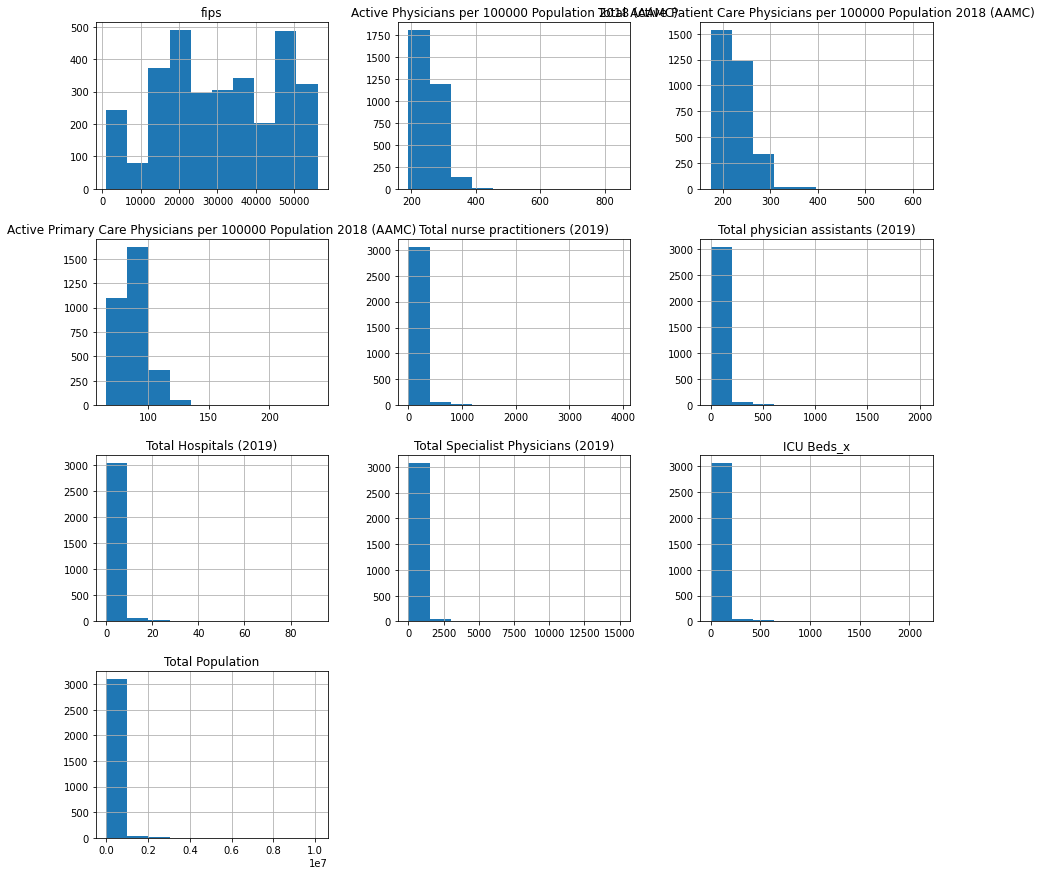

In [14]:
df.hist(figsize=(15,15), sharex=False)
plt.show()

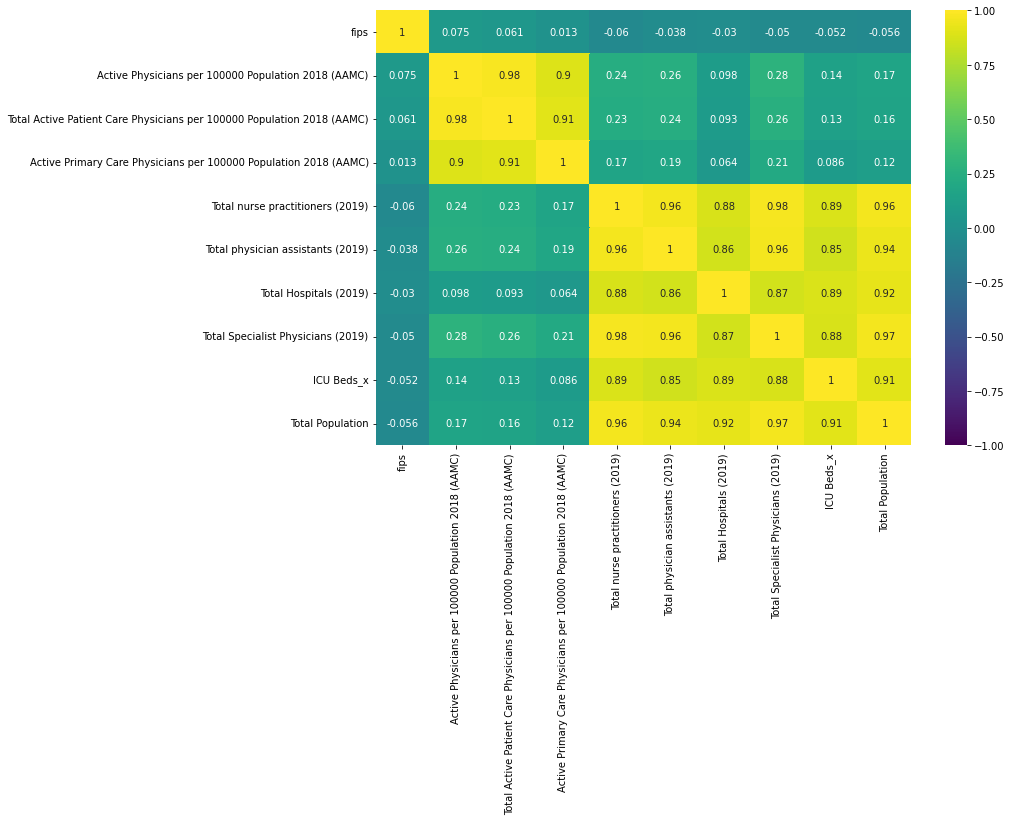

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

We observe strong correlations between:

* Active Physicians per 100000 Population 2018 (AAMC) and Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)  with Active Primary Care Physicians per 100000 Population 2018 (AAMC)

* Total physician assistants (2019) with Total nurse practitioners (2019)

* Total Hospitals (2019) with Total physician assistants (2019) and Total nurse practitioners (2019)

* Total Specialist Physicians (2019) with Total Hospitals (2019)

* ICU Beds_x with Total physician assistants (2019), Total nurse practitioners (2019), Total Specialist Physicians (2019) and Total Hospitals (2019)

* Total Population with ICU Beds_x, Total physician assistants (2019), Total nurse practitioners (2019), Total Specialist Physicians (2019) and Total Hospitals (2019)

### Outliers

In [16]:
variables = ['fips', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 
            'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Total Specialist Physicians (2019)', 'ICU Beds_x', 'Total Population']
for v in variables: 
    plt.figure(figsize=(5,5))
    fig = px.box(df, y=[v] )
    fig.show()

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

We observe several outliers, in order to obtain more information about them we use IQR method to know the boundaries. After that, we count how many register are above the upper bound and choose if we remove them or if we keep them.

In [17]:
# Using the IQR method function
def iqr_calc(col_name):
  stat = round(df[f'{col_name}'].describe(), 2)
  print(stat)
  IQR = stat['75%']-stat['25%']
  upper = stat['75%'] + 1.5*IQR
  lower = stat['25%'] - 1.5*IQR
  rows_out= df[df[f'{col_name}'] > upper].count()
  return f'In the {col_name} case the upper & lower for bounds for suspected outliers are {upper} and {lower}. Total of row off upper bound \n{rows_out}\n'



In [18]:
variables = ['Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 
            'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Total Specialist Physicians (2019)', 'ICU Beds_x', 'Total Population']
for v in variables: 
    print(iqr_calc(v))
    print("\n")

count    3140.00
mean      254.92
std        42.29
min       191.30
25%       227.60
50%       247.10
75%       278.80
max       847.00
Name: Active Physicians per 100000 Population 2018 (AAMC), dtype: float64
In the Active Physicians per 100000 Population 2018 (AAMC) case the upper & lower for bounds for suspected outliers are 355.6 and 150.79999999999995. Total of row off upper bound 
fips                                                                      120
Active Physicians per 100000 Population 2018 (AAMC)                       120
Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)    120
Active Primary Care Physicians per 100000 Population 2018 (AAMC)          120
Total nurse practitioners (2019)                                          120
Total physician assistants (2019)                                         120
Total Hospitals (2019)                                                    120
Total Specialist Physicians (2019)                              

In [19]:
# We remove the outliers only in the cases where it doesn't mean a bigger loss of data
df=df.drop(df[df['Active Physicians per 100000 Population 2018 (AAMC)'] > 356].index)
df=df.drop(df[df['Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)'] > 297.4].index)
df=df.drop(df[df['Active Primary Care Physicians per 100000 Population 2018 (AAMC)'] > 120].index)

## Construction of the model

In [20]:
# Separating the target variable (y) from the predictors(X)
X = df.drop(['ICU Beds_x'], axis=1)
y = df['ICU Beds_x']

In [21]:
# Spliting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Lasso with default parameters
pipeline = make_pipeline(StandardScaler(), Lasso()) 
pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)
print(pipeline[1].coef_, pipeline[1].intercept_)

[-0.         -0.         -0.         -0.98617577 46.98343226  0.
 19.52128096  9.70595949  0.        ] 21.46661101836394


In [23]:
print("Score with alpha in train dataset:", round(pipeline.score(X_train, y_train), 4))
print("Score with alpha in test dataset:", round(pipeline.score(X_test, y_test), 4))  

Score with alpha in train dataset: 0.8725
Score with alpha in test dataset: 0.8911


### Features selection

We keep the features that are relevant for the model, that is features with a weight greater than 0.

In [24]:
mask=pipeline[1].coef_!=0
X=X.loc[:,mask]
X.shape

(2996, 4)

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2996 entries, 0 to 3139
Data columns (total 4 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Active Primary Care Physicians per 100000 Population 2018 (AAMC)  2996 non-null   float64
 1   Total nurse practitioners (2019)                                  2996 non-null   float64
 2   Total Hospitals (2019)                                            2996 non-null   float64
 3   Total Specialist Physicians (2019)                                2996 non-null   float64
dtypes: float64(4)
memory usage: 181.6 KB


Last step, we must split the dataset into training and testing with the new feature selection.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Hyperparameters

Using cross validation.

In [27]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
pipeline_opt = make_pipeline(StandardScaler(), LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1))
# fit model
pipeline_opt.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning:

Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning:

Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1106191.6911406294, tolerance: 1843.6509548590489

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning:

Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning:

Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.

/u

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
                         n_jobs=-1))])

In [28]:
print("Score with alpha in train dataset:", round(pipeline_opt.score(X_train, y_train), 4))
print("Score with alpha in test dataset:", round(pipeline_opt.score(X_test, y_test), 4)) 

Score with alpha in train dataset: 0.8707
Score with alpha in test dataset: 0.9118
